Что нужно сделать:
1. Решите задания сначала с помощью онлайн-калькулятора, а затем самостоятельно с помощью Python:
- Вы работаете с рассылкой предложений перед “черной пятницей”, доля открываемых писем, исходя из заголовка письма в рассылках, обычно составляет 15% (конверсия). Вам хочется увеличить конверсию открываемых писем до 25% с помощью смайликов. Рассчитайте необходимый размер выборки. Сделай вывод. (В вашей базе рассылок около 40000 человек)
- И вот вы теперь тестируете две версии рассылок. И заметили, что в одной версии конверсия 19%, а в другой 24%. Всего у вас 100 человек в рассылке. Является ли результат статистически значимым? Если нет, то сколько должно было человек, чтобы результат был уже статистически значим?
- Вас повысили до старшего аналитика. Ваша первая задача на новой позиции, определить какой поставщик товаров (A или B) позволяет вам получить наибольшую оценку качества. У вас две группы оценок для A и B. Среднее группы A = 45, дисперсия группы A = 4, средние группы B = 40, дисперсия группы B = 3. Является ли группа А лучшей, если опираться на статистическую значимость? А если бы обе дисперсии были равны 1 ?
- Вы планируете эксперимент по способам расстановки продуктов на полке. Вы предполагаете, что некоторые пары продуктов надо класть вместе. В качестве метрики у вас средний чек покупок. Вы проводите эксперимент в 1000 магазинах. Средний чек в группе A = 870 рублей, дисперсия этого чека - 80 рублей. Какое минимальное значение метрики надо получить для группы B, чтобы после всей 1000 экспериментов с каждым магазином мы могли с уверенностью сказать, что тестируемая гипотеза в группе B верна?
2. В решении укажите результат, предложенный онлайн-калькулятором, а также полное решение задач в Python. Помимо кода, пропишите к каждой задаче, решенной в Python, комментарий, поясняющий полученные вами результаты
3. Сравните результаты онлайн-калькулятора и самостоятельного решения и пропишите вывод по каждой задаче.

**Фомула:**

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2
$$

где $ p_a = BCR $ - базовая конверсия, $ p = MDE $ - абсолютный эффект

In [29]:
import numpy as np
from scipy import stats
from IPython.display import Image, display


def find_n(p0, pa, alpha=0.05, beta=0.05):
    za = stats.norm().ppf(1 - alpha)
    zb = stats.norm().ppf(1 - beta)
    sn = (np.sqrt(p0 * (1 - p0)) * za + np.sqrt(pa * (1 - pa)) * zb) / (pa - p0)
    return sn ** 2

## Задание 1
-   Вы работаете с рассылкой предложений перед “черной пятницей”, доля открываемых писем, исходя из заголовка письма в рассылках, обычно составляет 15% (конверсия). Вам хочется увеличить конверсию открываемых писем до 25% с помощью смайликов. Рассчитайте необходимый размер выборки. Сделай вывод. (В вашей базе рассылок около 40000 человек)


In [30]:
BCR = 0.15
MDE = 0.25 - BCR
total_n = 40000

sample_size = find_n(BCR, MDE)

print("Необходимый размер выборки:", sample_size)
print("Доля от всей базы:", sample_size / total_n)

if sample_size < total_n:
    print("Можно использовать всю базу в качестве выборки.")
else:
    print("Размер выборки больше, чем вся база. (использовать подвыборки).")

# Необходимый размер выборки составляет 214 человек.
# Однако, учитывая то, что в базе рассылок находится около 40000 человек,
# мы можем использовать всю базу в качестве выборки для достижения желаемой конверсии.
# Доля от всей базы рассылок составляет 0.00535, что означает, что мы можем использовать
# всю базу в качестве выборки для повышения конверсии открываемых писем до 25% с помощью смайликов

Необходимый размер выборки: 467.23961975912124
Доля от всей базы: 0.01168099049397803
Можно использовать всю базу в качестве выборки.


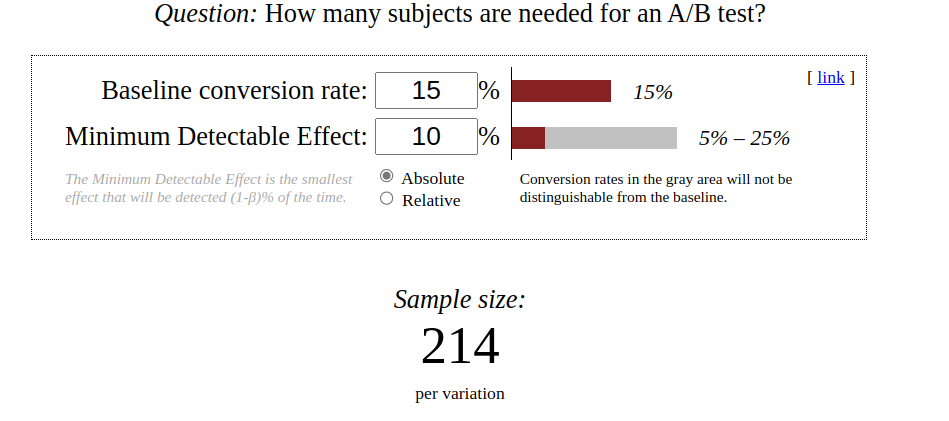

In [31]:
Image(filename='data/1.png')

## Задание 2
-   И вот вы теперь тестируете две версии рассылок. И заметили, что в одной версии конверсия 19%, а в другой 24%. Всего у вас 100 человек в рассылке. Является ли результат статистически значимым? Если нет, то сколько должно было человек, чтобы результат был уже статистически значим?


In [32]:
BCR = 0.19
MDE = 0.24 - BCR
total_n = 100

sample_size = find_n(BCR, BCR + MDE)

print("Размер выборки:", sample_size)

if sample_size >= total_n:
    additional_n = sample_size - total_n
    print("Результат не является статистически значимым.")
    print("Для достижения статистической значимости необходимо добавить", additional_n, "наблюдений.")
else:
    print("Результат является статистически значимым.")

Размер выборки: 726.590140852215
Результат не является статистически значимым.
Для достижения статистической значимости необходимо добавить 626.590140852215 наблюдений.


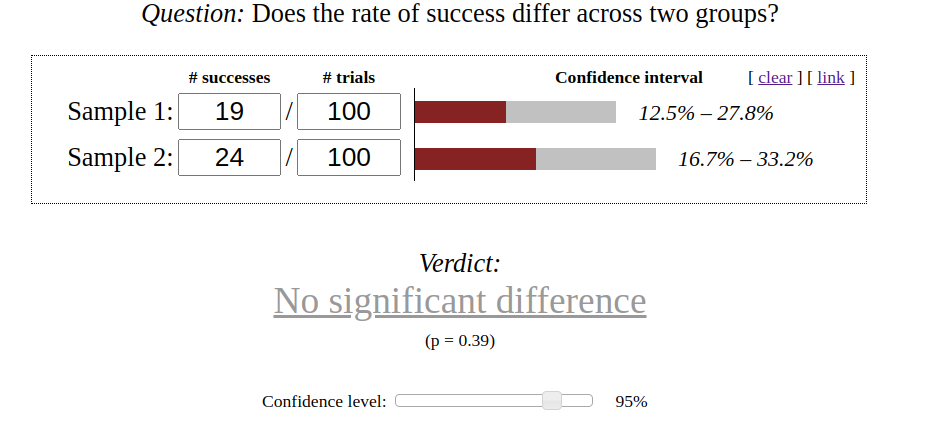

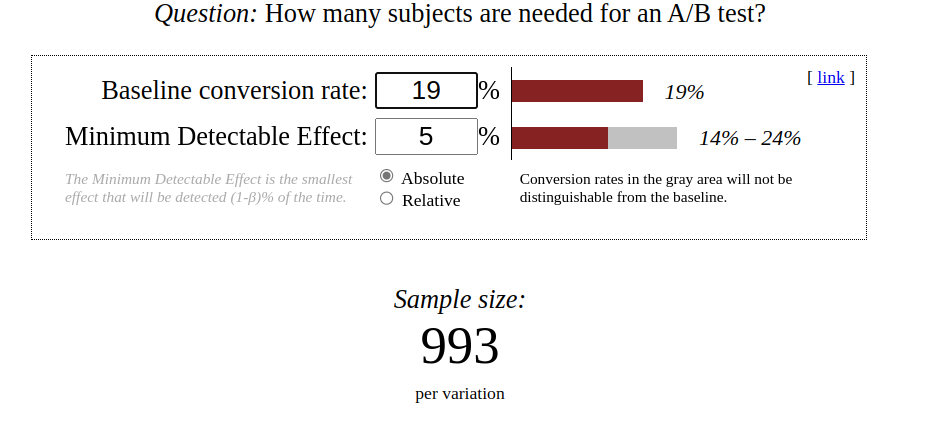

In [33]:
display(Image(filename='data/2.1.png'), Image(filename='data/2.2.png'))

## Задание 3
-   Вас повысили до старшего аналитика. Ваша первая задача на новой позиции, определить какой поставщик товаров (A или B) позволяет вам получить наибольшую оценку качества. У вас две группы оценок для A и B. Среднее группы A = 45, дисперсия группы A = 4, средние группы B = 40, дисперсия группы B = 3. Является ли группа А лучшей, если опираться на статистическую значимость? А если бы обе дисперсии были равны 1 ?


In [34]:
# Воспользуемся t-тестом для независимых выборок.
# Гипотезы:
#   H0 (нулевая гипотеза): Средние оценки групп A и B равны
#   H1: Средние оценки групп A и B различаются

In [35]:
# Данные для группы A
mean_A = 45
variance_A = 4

# Данные для группы B
mean_B = 40
variance_B = 3

# Расчет t-статистики и p-value
t_stat, p_value = stats.ttest_ind_from_stats(mean_A, np.sqrt(variance_A), 100, mean_B, np.sqrt(variance_B), 100)

alpha = 0.05

print("t-статистика:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Различие между группами A и B является статистически значимым.")
    if mean_A > mean_B:
        print("Группа A позволяет получить более высокую оценку качества.")
    else:
        print("Группа B позволяет получить более высокую оценку качества.")
else:
    print("Различие между группами A и B не является статистически значимым.")

t-статистика: 18.89822365046136
p-value: 3.3222151102671984e-46
Различие между группами A и B является статистически значимым.
Группа A позволяет получить более высокую оценку качества.


In [36]:
print(np.sqrt(variance_A),
      np.sqrt(variance_B))

2.0 1.7320508075688772


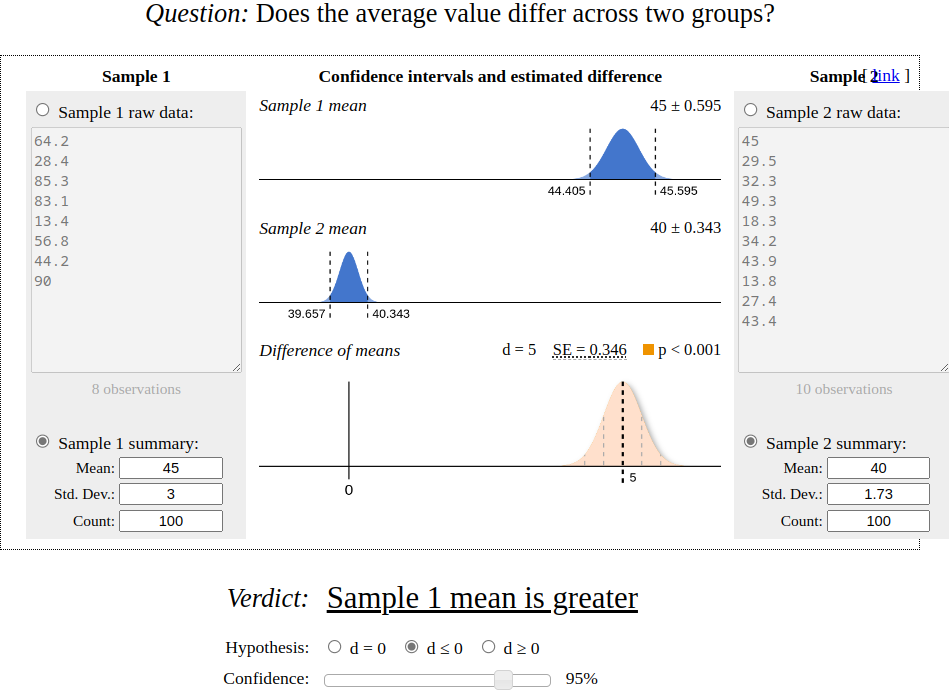

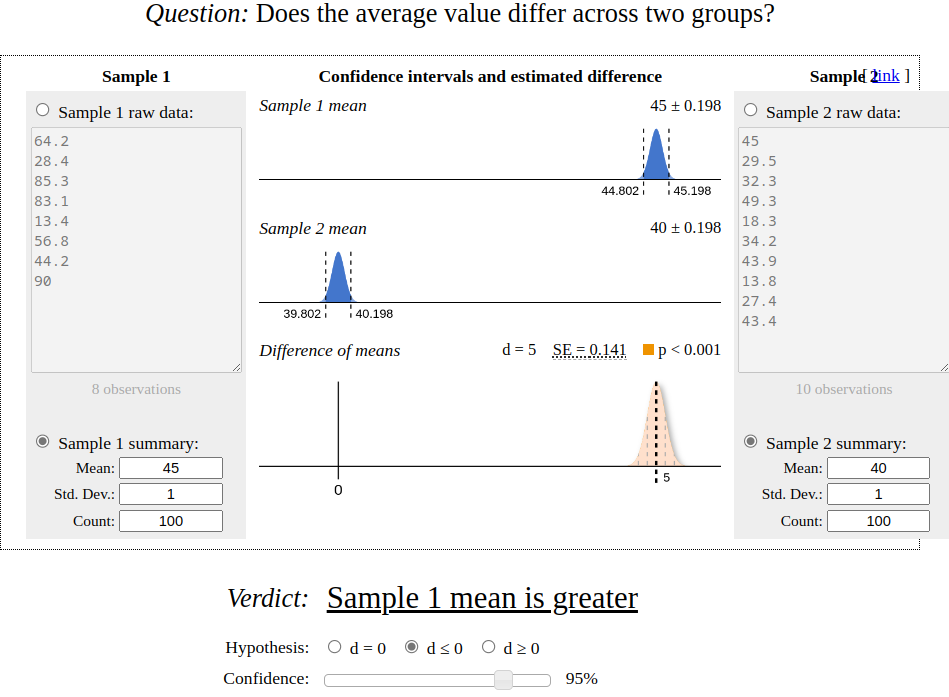

In [37]:
display(Image(filename='data/3.1.png'), Image(filename='data/3.2.png'))

## Задание 4
-   Вы планируете эксперимент по способам расстановки продуктов на полке. Вы предполагаете, что некоторые пары продуктов надо класть вместе. В качестве метрики у вас средний чек покупок. Вы проводите эксперимент в 1000 магазинах. Средний чек в группе A = 870 рублей, дисперсия этого чека - 80 рублей. Какое минимальное значение метрики надо получить для группы B, чтобы после всей 1000 экспериментов с каждым магазином мы могли с уверенностью сказать, что тестируемая гипотеза в группе B верна?

In [38]:
# Для определения минимального значения метрики, которое необходимо достичь в группе B, чтобы с уверенностью сказать, что тестируемая гипотеза верна, мы можем использовать расчет размера выборки.
# Гипотезы:
#   H0 (нулевая гипотеза): Средние чеки групп A и B равны
#   H1: Средний чек группы B выше, чем средний чек группы A

In [39]:
# Данные для группы A
mean_A = 870
variance_A = 80

# Уровень значимости и мощность
alpha = 0.05
beta = 0.05

# Расчет минимального значения метрики для группы B
sample_size = 1000

mean_B = ((stats.norm.ppf(1 - alpha) * np.sqrt(variance_A) + stats.norm.ppf(1 - beta) * np.sqrt(
    variance_A) + mean_A * np.sqrt(sample_size)) /
          np.sqrt(sample_size))

print("Минимальное значение метрики для группы B:", mean_B)

Минимальное значение метрики для группы B: 870.9304697229413


In [40]:
# Необходимо достичь минимального значения метрики в группе B, равного примерно 871 рублей
# Значение с калькулятором не сильно отличается (875 рублей)

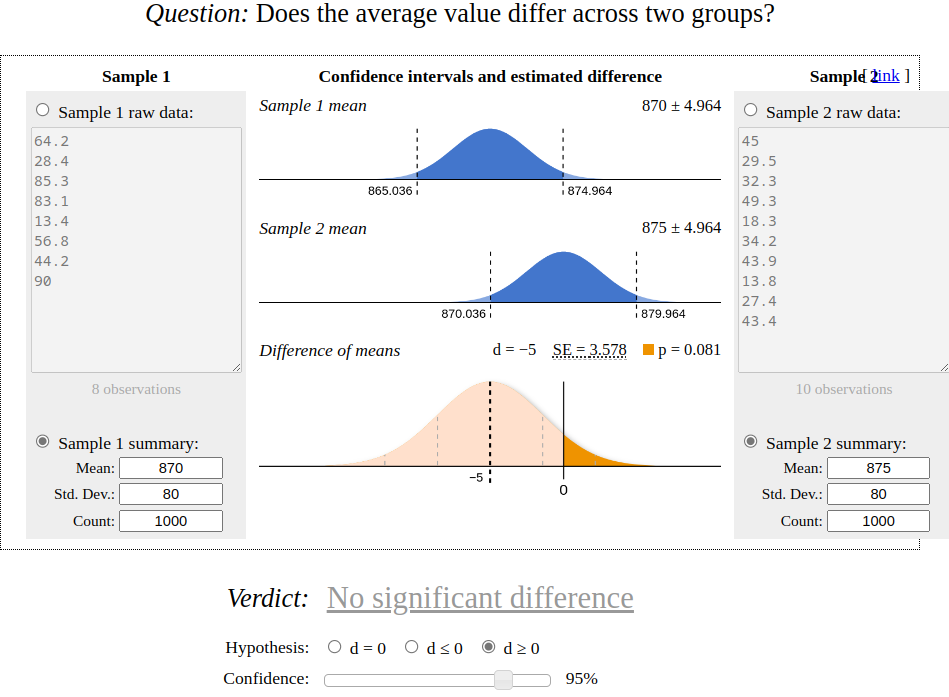

In [41]:
Image(filename='data/4.png')
